# Exploratory data analysis

In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Ananthapadmanabha\Desktop\Urban Sound Classification\URBAN SOUND CLASSIFICATION\UrbanSound8K\metadata\UrbanSound8K.csv')

In [26]:

import os
import struct
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd

def path_class(filename):
    excerpt = data[data['slice_file_name'] == filename]
    path_name = os.path.join(r'C:\Users\Ananthapadmanabha\Desktop\Urban Sound Classification\URBAN SOUND CLASSIFICATION\UrbanSound8K\audio', 'fold'+str(excerpt.fold.values[0]), filename)
    return path_name, excerpt['class'].values[0]

#function to understand the wave
def wav_plotter(full_path):   
    rate, wav_sample = wav.read(full_path)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('sampling rate: ',rate,'Hz')
    print('bit depth: ',bit_depth)
    #print('number of channels: ',wav_sample.shape[1])
    print('duration: ',wav_sample.shape[0]/rate,' second')
    print('number of samples: ',len(wav_sample))
    #print('class: ',class_label)
    plt.figure(figsize=(12, 4))
    plt.plot(wav_sample) 
    return ipd.Audio(full_path)

sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  2.25  second
number of samples:  99225


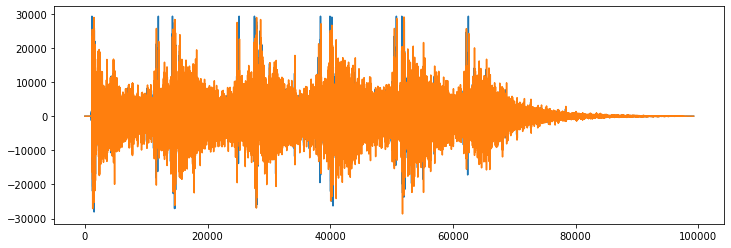

In [24]:
#path_class('7061-6-0-0.wav')
fullpath = r'C:\Users\Ananthapadmanabha\Desktop\Urban Sound Classification\URBAN SOUND CLASSIFICATION\UrbanSound8K\audio\fold1\7061-6-0-0.wav'
wav_plotter(fullpath)

sampling rate:  44100 Hz
bit depth:  16
duration:  0.2480045351473923  second
number of samples:  10937


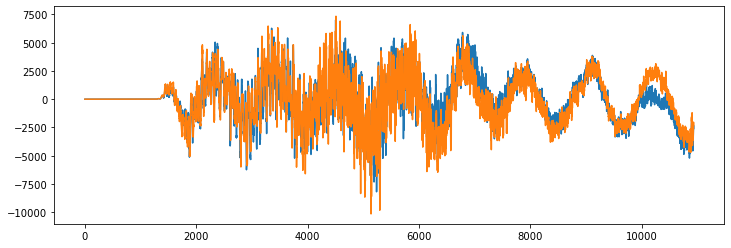

In [4]:
path_class('4201-3-0-0.wav')
fullpath = r'C:\Users\Ananthapadmanabha\Desktop\Urban Sound Classification\URBAN SOUND CLASSIFICATION\UrbanSound8K\audio\fold2\4201-3-0-0.wav'
wav_plotter(fullpath)

In [5]:
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


22050


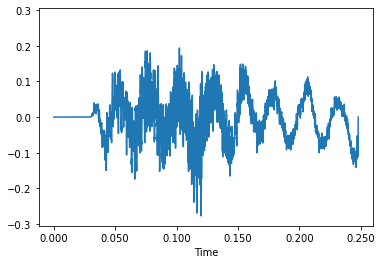

In [6]:

#plotting the waves from the folder
import librosa
import librosa.display
wave, sample_rate = librosa.load(fullpath)
print(sample_rate)
librosa.display.waveshow(wave,sr=sample_rate)


In [7]:
print(wave) #the values are getting normalized from -1 to +1

[ 0.          0.          0.         ... -0.07422104 -0.07476886
  0.        ]


In [8]:
import pandas as pd
metadata = pd.read_csv(r'C:\Users\Ananthapadmanabha\Desktop\Urban Sound Classification\URBAN SOUND CLASSIFICATION\UrbanSound8K\metadata\UrbanSound8K.csv')

In [9]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

There seems to be very less samples of gun_shot and car horn

In [11]:
#for the first folder in the csv file we have to get file names for each distinct class.


df = metadata.copy()
df.query('fold == 1',inplace=True)


In [12]:
classes = df['class'].unique().tolist()
classes

['dog_bark',
 'gun_shot',
 'jackhammer',
 'engine_idling',
 'children_playing',
 'siren',
 'street_music',
 'air_conditioner',
 'drilling',
 'car_horn']

In [13]:
#printing the names of classes of each type

filename_from_each_classes = []
for i in classes:
    file_name = df.loc[df['class'] == i, 'slice_file_name'].tolist()[0]
    filename_from_each_classes.append(file_name)
print(filename_from_each_classes)
print(len(filename_from_each_classes))

['101415-3-0-2.wav', '102305-6-0-0.wav', '103074-7-0-0.wav', '103258-5-0-0.wav', '105415-2-0-1.wav', '106905-8-0-0.wav', '108041-9-0-11.wav', '127873-0-0-0.wav', '14113-4-0-0.wav', '156194-1-0-0.wav']
10


sampling rate:  44100 Hz
bit depth:  16
duration:  2.61  second
number of samples:  115101


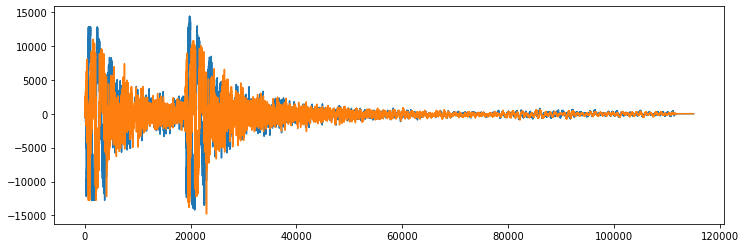

In [14]:
fullpath = r'C:\Users\Ananthapadmanabha\Desktop\Urban Sound Classification\URBAN SOUND CLASSIFICATION\UrbanSound8K\audio\fold1\102305-6-0-0.wav'
wav_plotter(fullpath)

sampling rate:  48000 Hz
bit depth:  16
duration:  4.0  second
number of samples:  192000
sampling rate:  44100 Hz
bit depth:  16
duration:  2.61  second
number of samples:  115101
sampling rate:  48000 Hz
bit depth:  24
duration:  4.0  second
number of samples:  192000
sampling rate:  48000 Hz
bit depth:  24
duration:  4.0  second
number of samples:  192000
sampling rate:  48000 Hz
bit depth:  16
duration:  4.0  second
number of samples:  192000
sampling rate:  44100 Hz
bit depth:  16
duration:  4.0  second
number of samples:  176400
sampling rate:  48000 Hz
bit depth:  16
duration:  4.0  second
number of samples:  192000
sampling rate:  48000 Hz
bit depth:  24
duration:  2.04  second
number of samples:  97920
sampling rate:  44100 Hz
bit depth:  16
duration:  4.0  second
number of samples:  176400
sampling rate:  44100 Hz
bit depth:  16
duration:  0.25  second
number of samples:  11025


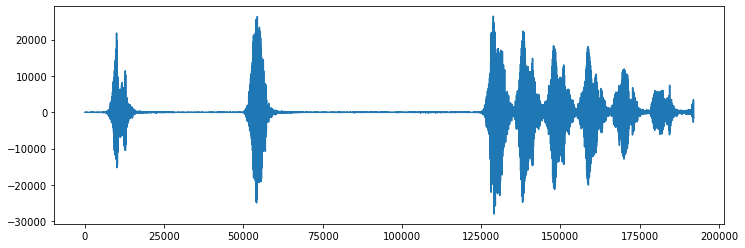

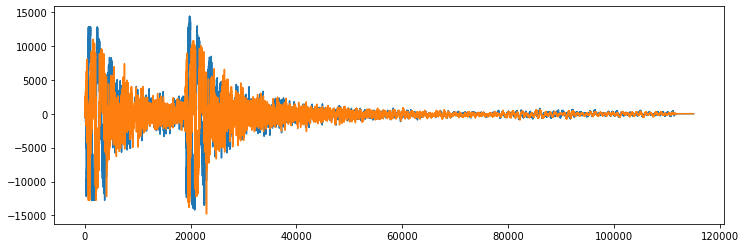

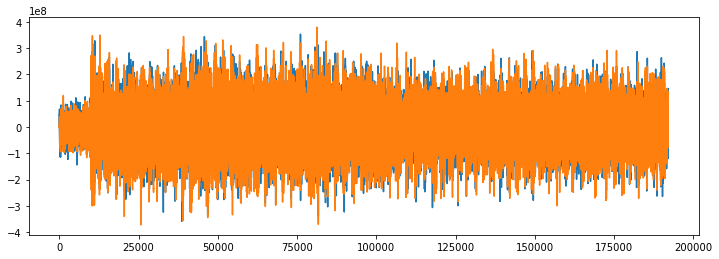

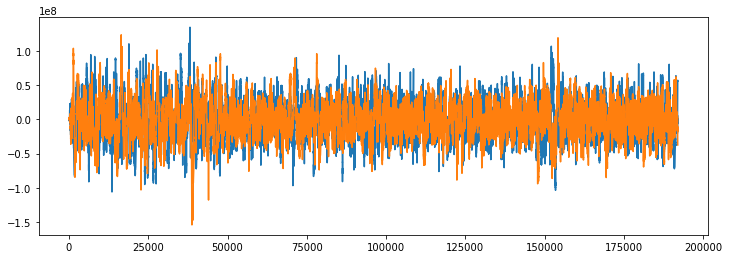

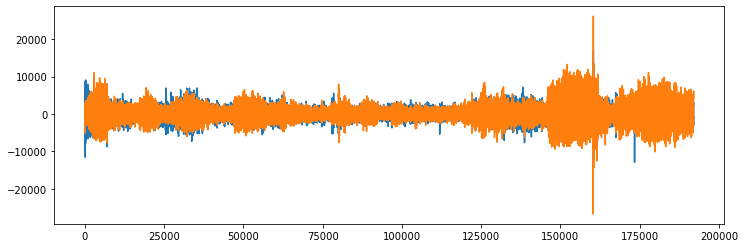

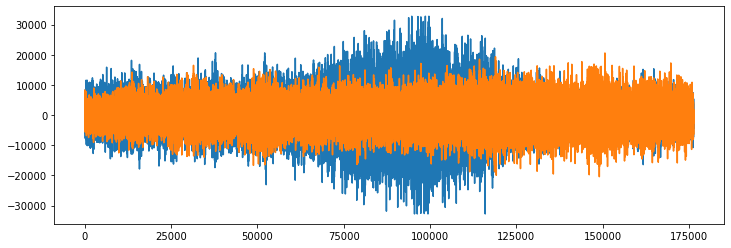

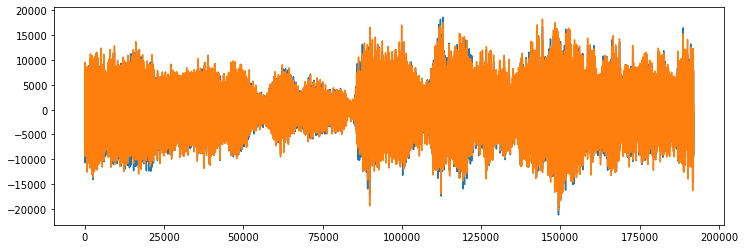

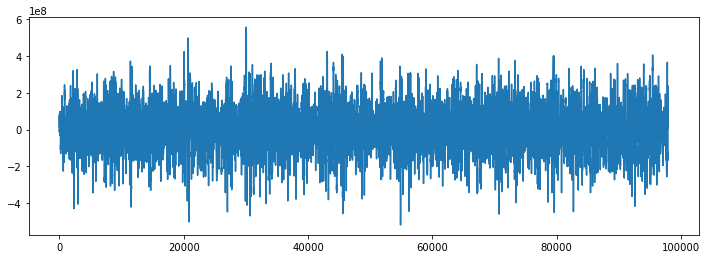

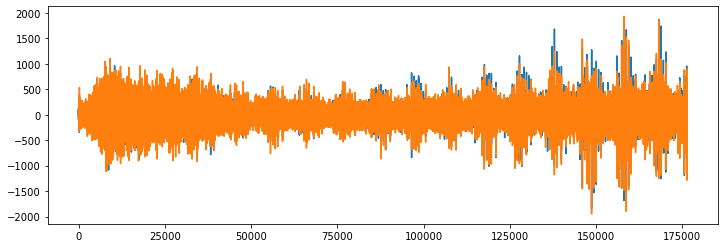

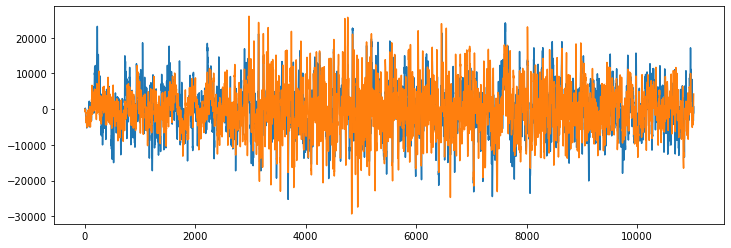

In [27]:
import os 
path = r'C:\Users\Ananthapadmanabha\Desktop\Urban Sound Classification\URBAN SOUND CLASSIFICATION\UrbanSound8K\audio\fold1'
for i in filename_from_each_classes:
    path_of_the_track = os.path.join(path,i)
    wav_plotter(path_of_the_track)
    

## Dataset Metadata 


In [20]:
metadata['class'].value_counts()


dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

## Observations

Here we can see the Class labels are unbalanced. Although 7 out of the 10 classes all have exactly 1000 samples, and siren is not far off with 929, the remaining two (car_horn, gun_shot) have significantly less samples at 43% and 37% respectively.

This will be a concern and something we may need to address later on.

## Audio Channels 

Most of the channels have 2 audio channels(means stereo) with a few with just one.

The easiest option here to make them uniform will be to merge the two channels in the stero samples into one by averaging the values of the two channels.

## Sample rate
There is a wide range of Sample rates that have been used across all the samples which is a concern (ranging from 96k to 8k).

This likley means that we will have to apply a sample-rate conversion technique (either up-conversion or down-conversion) so we can see an agnostic representation of their waveform which will allow us to do a fair comparison.

## Bit-depth
There is also a wide range of bit-depths. It's likely that we may need to normalise them by taking the maximum and minimum amplitude values for a given bit-depth.